<a href="https://colab.research.google.com/github/gong-aipel/AIFFEL_quest-cr/blob/main/DLthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 충돌 방지용 정리
!pip install --upgrade pip
!pip install --upgrade numpy protobuf wandb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 142.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.30.2
    Uninstalling protobuf-6.30.2:
      Successfully uninstalled protobuf-6.30.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: wandb
    Found existing installation: wandb 0.16.0
    Uninstalling wandb-0.16.0:
      Successfully uninstalled wandb-0.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following de

In [8]:
! pip install wandb==0.16.0

  Using cached wandb-0.16.0-py3-none-any.whl.metadata (9.8 kB)
  Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
Using cached wandb-0.16.0-py3-none-any.whl (2.1 MB)
Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: wandb
    Found existing installation: wandb 0.19.9
    Uninstalling wandb-0.19.9:
      Successfully uninstalled wandb-0.19.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [6]:
!pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4


In [7]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import glob
import os


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape( -1, 28, 28, 1)
X_test = X_test.reshape( -1, 28, 28, 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

# 시각화를 위해 sample 데이터를 준비합니다.
X_sample = X_test[:50]
y_sample = y_test[:50]

CLASS_NAMES = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
wandb.login(key = "47c68701571bde58f68d76cb66a8943d76a7f7d8")

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
sweep_config = {
    "name": "sweep_test_core",
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.001,
            "max" : 0.1
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 5,
            "max" : 10
            }

        }
    }

In [ ]:
def train():
    default_config = {
        "input" : (28,28,1),
        "filter" : 16,
        "kernel" : (3,3),
        "activation" : "relu",
        "learning_rate" : 0.005,
        "optimizer" : "adam",
        "loss" : "sparse_categorical_crossentropy",
        "metrics" : ["accuracy"],
        "epoch" : 5,
        "batch_size" : 32
    }

    wandb.init(config = default_config)
    config = wandb.config

    # Model

    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(config.filter, config.kernel, activation=config.activation, input_shape=config.input))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    # 머신 러닝 학습때 여러가지 optimzier를 사용할 경우나 learning rate를 조절할 경우에는 아래와 같은 형태의 코드를 응용합니다.

    if config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate = config.learning_rate)

    model.compile(optimizer = optimizer,
                  loss = config.loss,
                  metrics = config.metrics)

    # WandbCallback 함수는 후술합니다.

    model.fit(X_train, y_train,
              epochs = config.epoch,
              batch_size = config.batch_size,
              validation_data = (X_val, y_val))

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

    # wandb.log 함수 안에 기록하고 싶은 정보를 담습니다.

    wandb.log({"Test Accuracy Rate: " : round(test_accuracy * 100, 2),
               "Test Error Rate: " : round((1 - test_accuracy) * 100, 2)})

In [ ]:
# entity와 project에 본인의 아이디와 프로젝트명을 입력하세요

sweep_id = wandb.sweep(sweep_config,
                       entity = "qkar9933-aiffel",
                       project = "DLthon")

# run the sweep
wandb.agent(sweep_id,
            function=train,
            count=10)

Create sweep with ID: 4ga596f0
Sweep URL: https://wandb.ai/qkar9933-aiffel/DLthon/sweeps/4ga596f0


wandb: Agent Starting Run: 0kp4qn7g with config:
wandb: 	epoch: 10
wandb: 	learning_rate: 0.030498190414162227


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8048 - loss: 0.5971 - val_accuracy: 0.9158 - val_loss: 0.2607
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9103 - loss: 0.2947 - val_accuracy: 0.9342 - val_loss: 0.2244
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9120 - loss: 0.2976 - val_accuracy: 0.9150 - val_loss: 0.2759
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9120 - loss: 0.2930 - val_accuracy: 0.9062 - val_loss: 0.3402
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9166 - loss: 0.2924 - val_accuracy: 0.9316 - val_loss: 0.2551
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9183 - loss: 0.2816 - val_accuracy: 0.9304 - val_loss: 0.2428
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9198 - loss: 0.2779 - val_accuracy: 0.9384 - val_loss: 0.2091
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9175 -

Test Accuracy Rate:,▁
Test Error Rate:,▁
Test Accuracy Rate:,91.76
Test Error Rate:,8.24


wandb: Agent Starting Run: zg2u1au4 with config:
wandb: 	epoch: 9
wandb: 	learning_rate: 0.0999276842462878


Epoch 1/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.1021 - loss: 2.6808 - val_accuracy: 0.1180 - val_loss: 2.3150
Epoch 2/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.1027 - loss: 2.3144 - val_accuracy: 0.1010 - val_loss: 2.3205
Epoch 3/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.1004 - loss: 2.3145 - val_accuracy: 0.1180 - val_loss: 2.3097
Epoch 4/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.1003 - loss: 2.3143 - val_accuracy: 0.0970 - val_loss: 2.3074
Epoch 5/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.1071 - loss: 2.3139 - val_accuracy: 0.0884 - val_loss: 2.3175
Epoch 6/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.0998 - loss: 2.3158 - val_accuracy: 0.0970 - val_loss: 2.3300
Epoch 7/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.1067 - loss: 2.3139 - val_accuracy: 0.1180 - val_loss: 2.3171
Epoch 8/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.1047 - loss: 2

Test Accuracy Rate:,▁
Test Error Rate:,▁
Test Accuracy Rate:,10.5
Test Error Rate:,89.5


wandb: Agent Starting Run: mjkzl64a with config:
wandb: 	epoch: 8
wandb: 	learning_rate: 0.08034864618752711


Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.1035 - loss: 2.6671 - val_accuracy: 0.1068 - val_loss: 2.3138
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.1035 - loss: 2.3107 - val_accuracy: 0.1180 - val_loss: 2.3093
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.1036 - loss: 2.3110 - val_accuracy: 0.0980 - val_loss: 2.3106
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.1037 - loss: 2.3117 - val_accuracy: 0.0970 - val_loss: 2.3120
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.1019 - loss: 2.3124 - val_accuracy: 0.0970 - val_loss: 2.3036
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.1030 - loss: 2.3118 - val_accuracy: 0.1180 - val_loss: 2.3064
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.1063 - loss: 2.3106 - val_accuracy: 0.1010 - val_loss: 2.3097
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.1022 - loss: 2

Test Accuracy Rate:,▁
Test Error Rate:,▁
Test Accuracy Rate:,9.88
Test Error Rate:,90.12


wandb: Agent Starting Run: lrl26v44 with config:
wandb: 	epoch: 5
wandb: 	learning_rate: 0.07211785093819616


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.1038 - loss: 2.3305 - val_accuracy: 0.1000 - val_loss: 2.3063
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.1043 - loss: 2.3105 - val_accuracy: 0.1180 - val_loss: 2.3063
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.1039 - loss: 2.3104 - val_accuracy: 0.0970 - val_loss: 2.3155
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.1051 - loss: 2.3104 - val_accuracy: 0.1180 - val_loss: 2.3127
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.1073 - loss: 2.3096 - val_accuracy: 0.1010 - val_loss: 2.3089
157/157 - 1s - 6ms/step - accuracy: 0.0954 - loss: 2.3091


Test Accuracy Rate:,▁
Test Error Rate:,▁
Test Accuracy Rate:,9.54
Test Error Rate:,90.46


wandb: Agent Starting Run: ze30f13s with config:
wandb: 	epoch: 10
wandb: 	learning_rate: 0.08824991571781822


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.1013 - loss: 2.6038 - val_accuracy: 0.0980 - val_loss: 2.3075
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.1041 - loss: 2.3130 - val_accuracy: 0.1068 - val_loss: 2.3051
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.1000 - loss: 2.3123 - val_accuracy: 0.0970 - val_loss: 2.3233
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.1010 - loss: 2.3126 - val_accuracy: 0.0970 - val_loss: 2.3117
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.1025 - loss: 2.3134 - val_accuracy: 0.1010 - val_loss: 2.3103
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.1045 - loss: 2.3113 - val_accuracy: 0.1180 - val_loss: 2.3035
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.1017 - loss: 2.3119 - val_accuracy: 0.1068 - val_loss: 2.3081
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.1046 -

Test Accuracy Rate:,▁
Test Error Rate:,▁
Test Accuracy Rate:,9.46
Test Error Rate:,90.54


wandb: Agent Starting Run: n0ta15n3 with config:
wandb: 	epoch: 9
wandb: 	learning_rate: 0.09744490161482652


Epoch 1/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.1028 - loss: 2.6111 - val_accuracy: 0.1180 - val_loss: 2.3109
Epoch 2/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.1049 - loss: 2.3127 - val_accuracy: 0.1180 - val_loss: 2.3042
Epoch 3/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.1011 - loss: 2.3142 - val_accuracy: 0.0884 - val_loss: 2.3201
Epoch 4/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.1004 - loss: 2.3152 - val_accuracy: 0.1180 - val_loss: 2.3039
Epoch 5/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.1066 - loss: 2.3119 - val_accuracy: 0.1000 - val_loss: 2.3045
Epoch 6/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.1023 - loss: 2.3138 - val_accuracy: 0.1068 - val_loss: 2.3080
Epoch 7/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.1043 - loss: 2.3130 - val_accuracy: 0.1180 - val_loss: 2.3049
Epoch 8/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.1006 - loss: 2

Test Accuracy Rate:,▁
Test Error Rate:,▁
Test Accuracy Rate:,10.5
Test Error Rate:,89.5


wandb: Agent Starting Run: xe9tesgr with config:
wandb: 	epoch: 9
wandb: 	learning_rate: 0.08367865378843374


Epoch 1/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.1019 - loss: 2.4267 - val_accuracy: 0.0968 - val_loss: 2.3089
Epoch 2/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.1027 - loss: 2.3117 - val_accuracy: 0.1180 - val_loss: 2.3100
Epoch 3/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.1038 - loss: 2.3127 - val_accuracy: 0.1000 - val_loss: 2.3110
Epoch 4/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.1020 - loss: 2.3118 - val_accuracy: 0.1180 - val_loss: 2.3091
Epoch 5/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.1013 - loss: 2.3118 - val_accuracy: 0.1068 - val_loss: 2.3122
Epoch 6/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.1015 - loss: 2.3110 - val_accuracy: 0.1068 - val_loss: 2.3114
Epoch 7/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.1025 - loss: 2.3129 - val_accuracy: 0.0884 - val_loss: 2.3110
Epoch 8/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.1007 - loss: 2

Test Accuracy Rate:,▁
Test Error Rate:,▁
Test Accuracy Rate:,9.88
Test Error Rate:,90.12


wandb: Agent Starting Run: 851cop0v with config:
wandb: 	epoch: 6
wandb: 	learning_rate: 0.010337674909456494


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9188 - loss: 0.2543 - val_accuracy: 0.9788 - val_loss: 0.0704
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9782 - loss: 0.0762 - val_accuracy: 0.9766 - val_loss: 0.0869
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9802 - loss: 0.0697 - val_accuracy: 0.9692 - val_loss: 0.1245
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9822 - loss: 0.0621 - val_accuracy: 0.9850 - val_loss: 0.0602
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9844 - loss: 0.0571 - val_accuracy: 0.9768 - val_loss: 0.0948
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9843 - loss: 0.0593 - val_accuracy: 0.9800 - val_loss: 0.0940
157/157 - 1s - 6ms/step - accuracy: 0.9790 - loss: 0.0941


Test Accuracy Rate:,▁
Test Error Rate:,▁
Test Accuracy Rate:,97.9
Test Error Rate:,2.1


wandb: Agent Starting Run: o9l79477 with config:
wandb: 	epoch: 10
wandb: 	learning_rate: 0.02782945239703306


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.5964 - loss: 1.1539 - val_accuracy: 0.7920 - val_loss: 0.6753
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7796 - loss: 0.6663 - val_accuracy: 0.7782 - val_loss: 0.6526
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.7794 - loss: 0.6507 - val_accuracy: 0.7864 - val_loss: 0.6211
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8014 - loss: 0.6026 - val_accuracy: 0.8072 - val_loss: 0.6114
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8158 - loss: 0.5728 - val_accuracy: 0.8168 - val_loss: 0.5465
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.8245 - loss: 0.5515 - val_accuracy: 0.8266 - val_loss: 0.5573
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8231 - loss: 0.5564 - val_accuracy: 0.8500 - val_loss: 0.4809
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8243 -

Test Accuracy Rate:,▁
Test Error Rate:,▁
Test Accuracy Rate:,84.5
Test Error Rate:,15.5


wandb: Agent Starting Run: 7ya3giv6 with config:
wandb: 	epoch: 6
wandb: 	learning_rate: 0.04176767388346941


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.8328 - loss: 0.5415 - val_accuracy: 0.9388 - val_loss: 0.2080
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9227 - loss: 0.2812 - val_accuracy: 0.9276 - val_loss: 0.2675
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9204 - loss: 0.3020 - val_accuracy: 0.9368 - val_loss: 0.2240
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9207 - loss: 0.3014 - val_accuracy: 0.9410 - val_loss: 0.2185
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9228 - loss: 0.2982 - val_accuracy: 0.9214 - val_loss: 0.2939
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9203 - loss: 0.3131 - val_accuracy: 0.9288 - val_loss: 0.2996
157/157 - 1s - 5ms/step - accuracy: 0.9254 - loss: 0.2968


Test Accuracy Rate:,▁
Test Error Rate:,▁
Test Accuracy Rate:,92.54
Test Error Rate:,7.46


In [1]:
# 딱 맞는 안정 조합으로 설치
!pip install numpy==1.26.4
!pip install wandb==0.15.12
!pip install protobuf>=5.26.1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.7 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8792 sha256=91cc401145a9fa75bb0db4706b8b28f86f063d5e6057623e5d9e9d91547c5c10
  Stored in directory: /root/.cache/pip/wheels/ea/b7/8b/84e94095ea418b9442f5abeba4ca7b0ad52d3fe7b69d6238a6
Successfully built pathtools
  Attempting uninstall: wandb
    Found existing installation: wandb 0.16.0
    Uninstalling wandb-0.16.0:
      Successfully uninstalled wandb-0.16.0


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import wandb
from wandb.keras import WandbCallback
from PIL import Image
import os
import glob



In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 실제 데이터 경로 (수정 필요하면 여기!)
data_dir = "/content/drive/MyDrive/Colab Notebooks/DLthon/jeyllish"

image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    brightness_range=(0.6, 1.4),
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1504 images belonging to 7 classes.
Found 375 images belonging to 7 classes.


In [7]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # 일단 고정

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1101s 23s/step - accuracy: 0.4160 - loss: 1.7087 - val_accuracy: 0.5200 - val_loss: 1.5530
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.5185 - loss: 1.5605 - val_accuracy: 0.5200 - val_loss: 1.5529
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.5386 - loss: 1.5199 - val_accuracy: 0.5200 - val_loss: 1.5531
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.5304 - loss: 1.5367 - val_accuracy: 0.5200 - val_loss: 1.5550
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5142 - loss: 1.5671 - val_accuracy: 0.5200 - val_loss: 1.5526
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.5167 - loss: 1.5620 - val_accuracy: 0.5200 - val_loss: 1.5529
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.5071 - loss: 1.5757 - val_accuracy: 0.5200 - val_loss: 1.5541
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.5209 - loss: 1.5557 - val_accuracy: 0.5200 -

In [9]:
# base_model의 가중치도 같이 학습
base_model.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 594s 11s/step - accuracy: 0.0942 - loss: 2.0996 - val_accuracy: 0.5200 - val_loss: 1.6402
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 534s 11s/step - accuracy: 0.2108 - loss: 1.9005 - val_accuracy: 0.5200 - val_loss: 1.6976
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 516s 11s/step - accuracy: 0.3364 - loss: 1.7747 - val_accuracy: 0.5013 - val_loss: 1.8080
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 509s 11s/step - accuracy: 0.4621 - loss: 1.6885 - val_accuracy: 0.0800 - val_loss: 1.9744
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 519s 11s/step - accuracy: 0.5084 - loss: 1.5921 - val_accuracy: 0.1547 - val_loss: 1.9817


In [10]:
# 1. 기본 라이브러리
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. 데이터 전처리
data_dir = "/content/drive/MyDrive/Colab Notebooks/DLthon/jeyllish"  # 실제 데이터 폴더
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    brightness_range=(0.6, 1.4),
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# 3. ResNet50 모델 구성 (전이학습)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # 가중치 고정

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# 4. 컴파일
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5. 학습
history_resnet = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Found 1504 images belonging to 7 classes.
Found 375 images belonging to 7 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 348s 7s/step - accuracy: 0.4370 - loss: 1.7033 - val_accuracy: 0.5200 - val_loss: 1.5532
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 332s 7s/step - accuracy: 0.5491 - loss: 1.5021 - val_accuracy: 0.5200 - val_loss: 1.5551
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 331s 7s/step - accuracy: 0.5350 - loss: 1.5276 - val_accuracy: 0.5200 - val_loss: 1.5512
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 334s 7s/step - accuracy: 0.5191 - loss: 1.5589 - val_accuracy: 0.5200 - val_loss: 1.5510
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 335s 7s/step - accuracy: 0.5205 - loss: 1.5536 - val_accuracy: 0.5200 - val_loss: 1.5573
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 331s 7s/step - accuracy: 0.5107 - loss: 1.5725 - val_accuracy: 0.5200 - val_loss: 1.5559
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 348s 7s/step - accuracy: 0.5093 - loss: 1.5714 - val_accuracy: 0.5

In [15]:
!ls "/content/drive/MyDrive/Colab Notebooks/DLthon/jeyllish/lions_mane_jellyfish"


01.jpg	29.jpg	56.jpg	       aug-13-17.jpg  aug-33-41.jpg  aug-53-70.jpg   aug-73-16.jpg
02.jpg	30.jpg	57.jpg	       aug-14-18.jpg  aug-34-43.jpg  aug-54-71.jpg   aug-74-17.jpg
03.jpg	31.jpg	59.jpg	       aug-15-20.jpg  aug-35-44.jpg  aug-55-72.jpg   aug-75-18.jpg
04.jpg	32.jpg	60.jpg	       aug-16-21.jpg  aug-36-45.jpg  aug-56-73.jpeg  aug-76-20.jpg
05.jpg	34.jpg	61.jpg	       aug-17-22.jpg  aug-37-47.jpg  aug-57-74.png   aug-77-21.jpg
06.jpg	35.jpg	62.jpg	       aug-18-23.jpg  aug-38-48.jpg  aug-58-75.jpeg  aug-78-22.jpg
07.jpg	36.jpg	65.jpg	       aug-19-24.jpg  aug-39-49.jpg  aug-59-76.jpg   aug-79-23.jpg
08.jpg	37.jpg	68.jpg	       aug-20-25.jpg  aug-40-50.jpg  aug-60-77.jpg   aug-80-24.jpg
09.jpg	38.jpg	69.jpg	       aug-2-03.jpg   aug-4-05.jpg   aug-6-07.jpg    aug-8-09.jpg
10.jpg	39.jpg	70.jpg	       aug-21-26.JPG  aug-41-52.jpg  aug-61-01.jpg   aug-81-25.jpg
11.jpg	40.jpg	71.jpg	       aug-22-29.jpg  aug-42-54.jpg  aug-62-02.jpg   aug-82-26.JPG
15.jpg	41.jpg	72.jpg	       aug-2

In [1]:
!pip install wandb==0.19.8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: wandb
    Found existing installation: wandb 0.15.12
    Uninstalling wandb-0.15.12:
      Successfully uninstalled wandb-0.15.12


In [2]:
!pip install torch torchvision wandb

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import wandb

In [7]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: qkar9933 (qkar9933-aiffel) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [8]:
wandb.init(
    project = "jellyfish-classification",
    name = "resnet50-baseline",
    config = {
        "epochs": 5,
        "batch_size": 32,
        "learning_rate": 0.001,
        "model": "ResNet-50"
    }
)

config = wandb.config

In [10]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/DLthon/jeyllish"



In [11]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [22]:
from torchvision import datasets, transforms

data_dir = "/content/drive/MyDrive/Colab Notebooks/DLthon/jeyllish/Train_Test_Valid"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root=data_dir + '/Train', transform=transform)
val_dataset = datasets.ImageFolder(root=data_dir + '/valid', transform=transform)

print("클래스 목록:", train_dataset.classes)
print("Train 이미지 수:", len(train_dataset))
print("Valid 이미지 수:", len(val_dataset))


클래스 목록: ['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']
Train 이미지 수: 900
Valid 이미지 수: 39


In [23]:
from torch.utils.data import DataLoader

# 하이퍼파라미터
batch_size = 32

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 확인
print("Train 배치 수:", len(train_loader))
print("Valid 배치 수:", len(val_loader))


Train 배치 수: 29
Valid 배치 수: 2


In [24]:
def generate_gradcam(model, img_tensor, target_class, target_layer="layer4"):
    model.eval()
    img_tensor = img_tensor.unsqueeze(0)  # (1, 3, 224, 224)

    # Hook: 마지막 conv layer의 출력값과 gradient 저장
    activations = []
    gradients = []

    def forward_hook(module, input, output):
        activations.append(output)

    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0])

    handle_f = getattr(model, target_layer).register_forward_hook(forward_hook)
    handle_b = getattr(model, target_layer).register_backward_hook(backward_hook)

    output = model(img_tensor)
    pred_class = output.argmax(dim=1).item() if target_class is None else target_class
    loss = output[0, pred_class]
    loss.backward()

    # Grad-CAM 계산
    grad = gradients[0]
    act = activations[0]
    weights = grad.mean(dim=(2, 3), keepdim=True)
    cam = (weights * act).sum(dim=1).squeeze()
    cam = cam.detach().numpy()
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()

    # Hook 제거
    handle_f.remove()
    handle_b.remove()

    return cam


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# 1. 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. 모델 정의 (ResNet18 + 마지막 레이어 교체)
model = models.resnet18(pretrained=True)
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# 3. 손실 함수, 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 4. 학습 루프
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = correct / total
    print(f"[Epoch {epoch+1}] Train Loss: {running_loss:.4f}, Accuracy: {train_acc:.4f}")

    # 검증
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    val_acc = val_correct / val_total
    print(f"            Val Accuracy: {val_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 60.1MB/s]


[Epoch 1] Train Loss: 21.6122, Accuracy: 0.7633
            Val Accuracy: 0.7436
[Epoch 2] Train Loss: 2.4051, Accuracy: 0.9911
            Val Accuracy: 0.7179
[Epoch 3] Train Loss: 0.7198, Accuracy: 1.0000
            Val Accuracy: 0.7436
[Epoch 4] Train Loss: 0.4258, Accuracy: 1.0000
            Val Accuracy: 0.7179
[Epoch 5] Train Loss: 0.3229, Accuracy: 1.0000
            Val Accuracy: 0.7692
[Epoch 6] Train Loss: 0.3101, Accuracy: 1.0000
            Val Accuracy: 0.7179
[Epoch 7] Train Loss: 0.4145, Accuracy: 0.9978
            Val Accuracy: 0.6667
[Epoch 8] Train Loss: 0.5390, Accuracy: 0.9978
            Val Accuracy: 0.7436
[Epoch 9] Train Loss: 0.4155, Accuracy: 0.9989
            Val Accuracy: 0.7692
[Epoch 10] Train Loss: 0.2006, Accuracy: 1.0000
            Val Accuracy: 0.7692


In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
from PIL import Image

# 1. Grad-CAM 생성 함수
def generate_gradcam(model, img_tensor, target_class=None, target_layer='layer4'):
    model.eval()
    activations = []
    gradients = []

    def forward_hook(module, input, output):
        activations.append(output)

    def backward_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0])

    # Hook 등록
    layer = dict([*model.named_modules()])[target_layer]
    f_hook = layer.register_forward_hook(forward_hook)
    b_hook = layer.register_backward_hook(backward_hook)

    output = model(img_tensor)
    if target_class is None:
        target_class = torch.argmax(output)
    loss = output[0, target_class]
    loss.backward()

    # Grad-CAM 계산
    grads = gradients[0]
    acts = activations[0]
    pooled_grads = torch.mean(grads, dim=[0, 2, 3])
    for i in range(acts.shape[1]):
        acts[:, i, :, :] *= pooled_grads[i]
    heatmap = torch.mean(acts, dim=1).squeeze()
    heatmap = np.maximum(heatmap.detach().cpu().numpy(), 0)
    heatmap /= np.max(heatmap)

    f_hook.remove()
    b_hook.remove()

    return heatmap

# 2. 시각화 함수
def show_gradcam_on_image(img_path, model, transform):
    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)

    heatmap = generate_gradcam(model, img_tensor)

    img_cv = cv2.cvtColor(np.array(img.resize((224, 224))), cv2.COLOR_RGB2BGR)
    heatmap_resized = cv2.resize(heatmap, (img_cv.shape[1], img_cv.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_cv, 0.6, heatmap_colored, 0.4, 0)

    # 시각화
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Grad-CAM Heatmap")
    plt.imshow(heatmap_resized, cmap='jet')
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Overlay")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


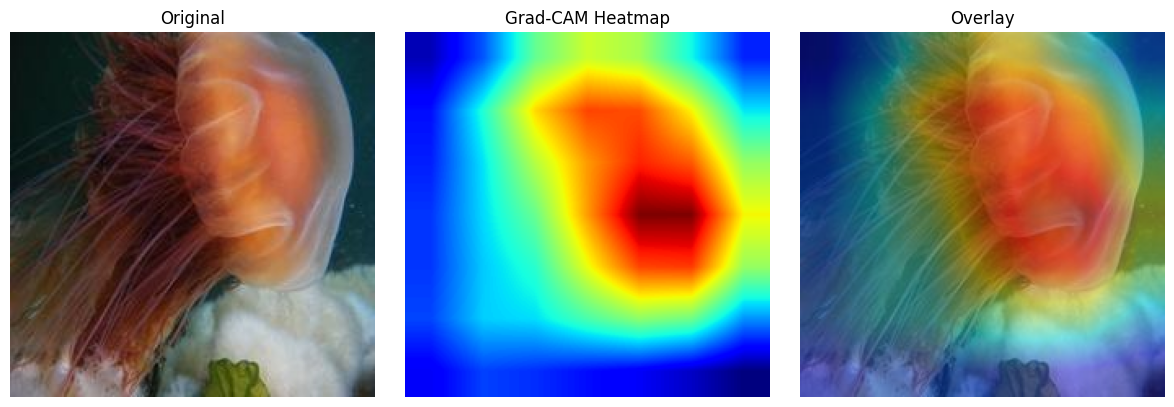

In [28]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

img_path = "/content/drive/MyDrive/Colab Notebooks/DLthon/jeyllish/Train_Test_Valid/Train/lions_mane_jellyfish/03.jpg"
show_gradcam_on_image(img_path, model, transform)


❌ 틀린 예측 수: 9

[예측: blue_jellyfish] [정답: Moon_jellyfish]


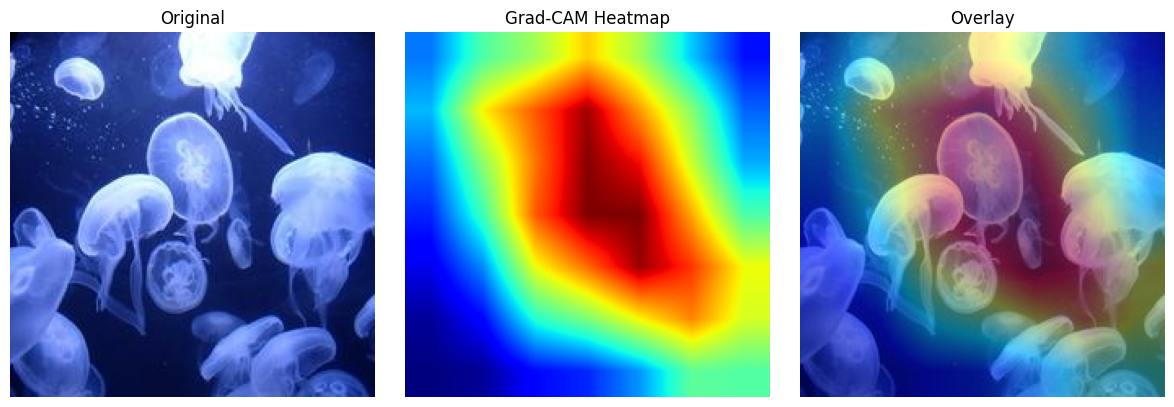


[예측: blue_jellyfish] [정답: Moon_jellyfish]


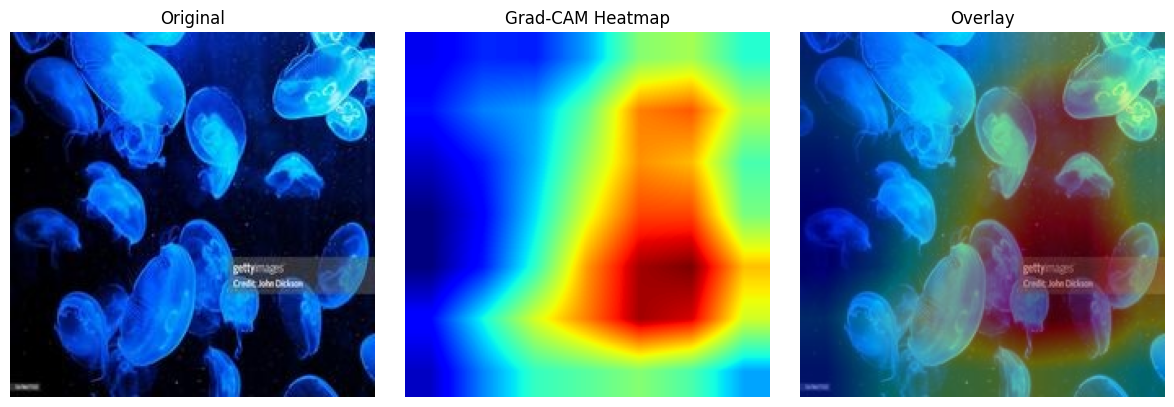


[예측: blue_jellyfish] [정답: Moon_jellyfish]


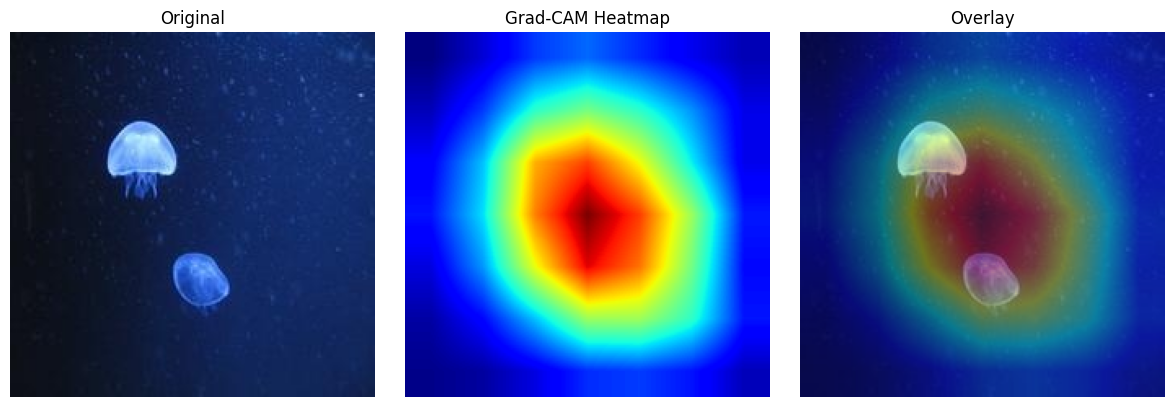


[예측: Moon_jellyfish] [정답: blue_jellyfish]


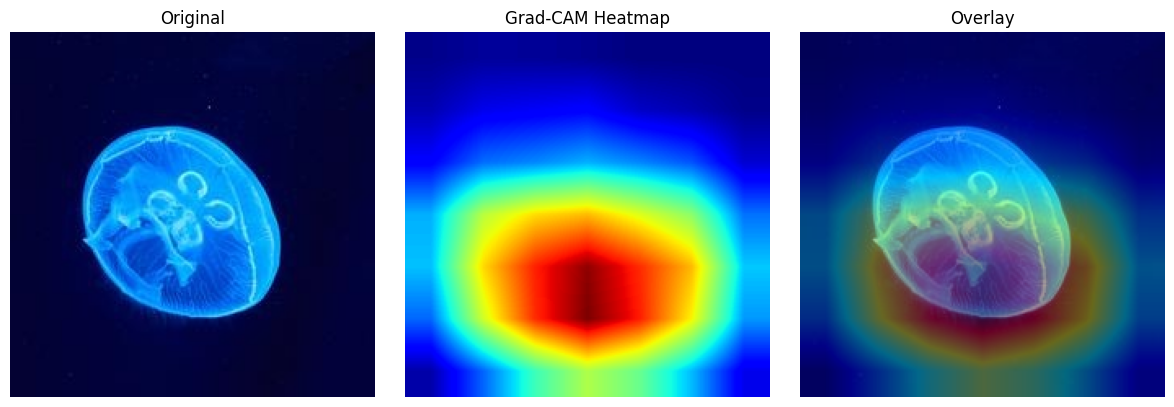


[예측: Moon_jellyfish] [정답: blue_jellyfish]


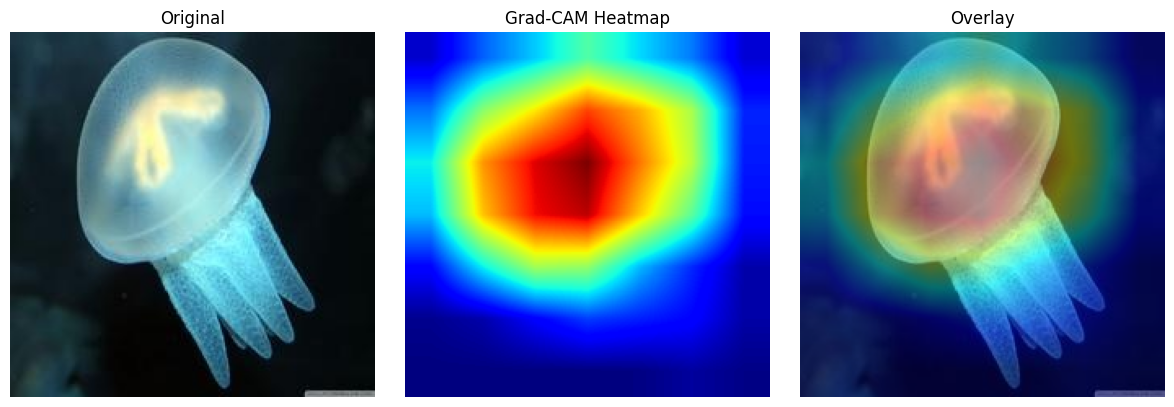

In [29]:
wrong_cases = []
model.eval()

with torch.no_grad():
    for i, (inputs, labels) in enumerate(val_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)

        for j in range(len(labels)):
            if preds[j] != labels[j]:
                idx = i * val_loader.batch_size + j
                if idx < len(val_dataset):
                    path = val_dataset.samples[idx][0]
                    true_label = val_dataset.classes[labels[j].item()]
                    pred_label = val_dataset.classes[preds[j].item()]
                    wrong_cases.append((path, true_label, pred_label))

# 최대 5장만 시각화
print(f"❌ 틀린 예측 수: {len(wrong_cases)}")
for path, true_label, pred_label in wrong_cases[:5]:
    print(f"\n[예측: {pred_label}] [정답: {true_label}]")
    show_gradcam_on_image(path, model, transform)
